<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Ensemble Methods</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons

%config InlineBackend.figure_format = "retina"

In [2]:
import sys
sys.path.append("../files")
import utils

## Voting Methods

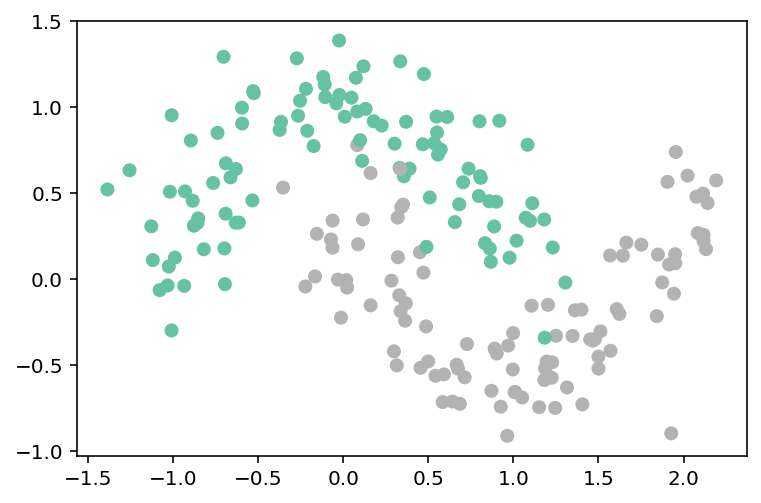

In [4]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression(C=1)
svm = SVC(C=1, kernel="linear", probability=True)
tree = DecisionTreeClassifier(max_depth=3)

clf = VotingClassifier([
    ("logreg", logreg),
    ("svm", svm),
    ("tree", tree)
], voting="soft")

In [7]:
logreg.fit(X, y)
svm.fit(X, y)
tree.fit(X, y)
clf.fit(X, y)

print("----Precision----")
models = logreg, svm, tree, clf
spacing = max([len(model.__class__.__name__) for model in models]) + 4
for model in models:
    model.fit(X, y)
    model_score = precision_score(y_test, model.predict(X_test))
    model_name = model.__class__.__name__
    len_model_name = len(model_name)
    print(f"{model_name}: {model_score:>{spacing - len_model_name}.2f}")

----Precision----
LogisticRegression:     0.84
SVC:                    0.84
DecisionTreeClassifier: 0.90
VotingClassifier:       0.90


## Bagging

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
one_tree = DecisionTreeClassifier(random_state=2718)
lots_of_trees = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  bootstrap=True, max_samples=100, n_jobs=-1)

one_tree.fit(X, y)
lots_of_trees.fit(X, y);

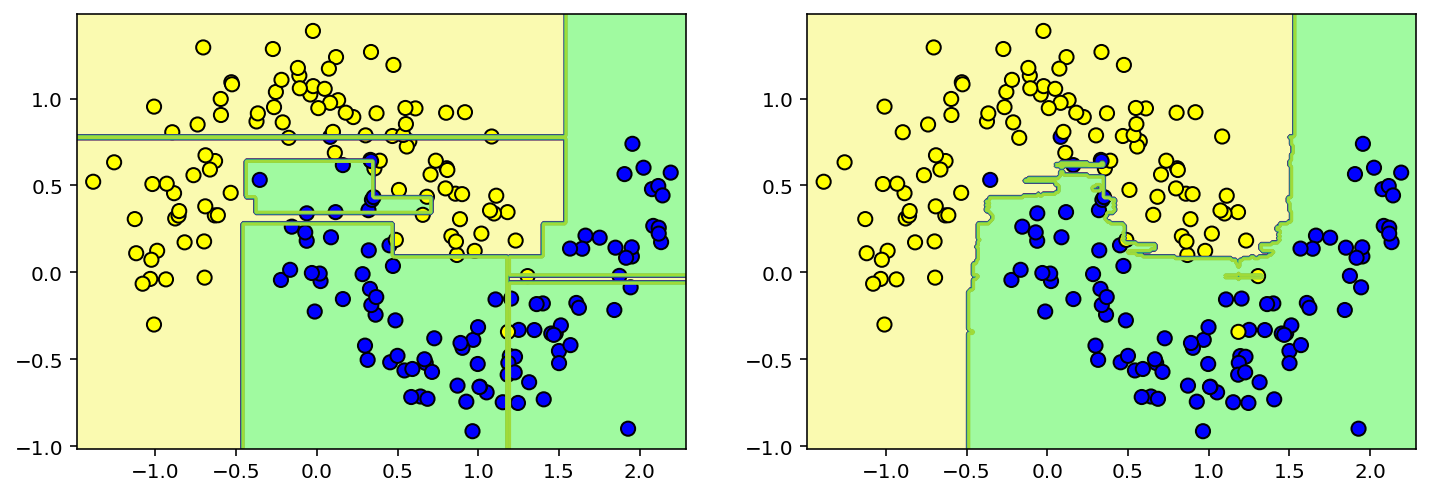

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, one_tree, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, lots_of_trees, ax=ax[1], contour=True)

In [11]:
# Evaluando el modelo con los datos no entrenados
lots_of_trees = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)
lots_of_trees.fit(X, y);
lots_of_trees.oob_score_

0.95

### Random Forests

Un _Bagging Classifier_ considerando árboles de decisión es conocido como un **Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=314, n_jobs=-1, oob_score=True)
rf.fit(X_test, y_test)
rf.oob_score_

0.85

In [13]:
# Predicción por medio de votos
rf.predict_proba(X[[3]])

array([[0.1825, 0.8175]])

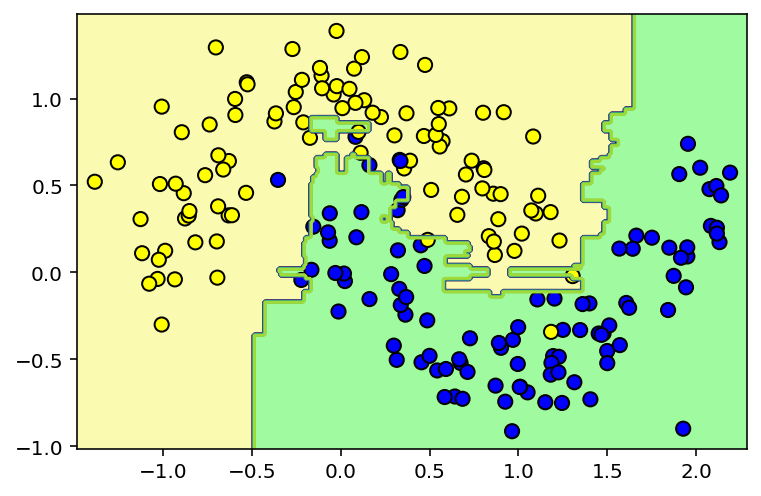

In [14]:
fig, ax = plt.subplots()
utils.plot_classf_model(X, y, rf, ax=ax, contour=True)

<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

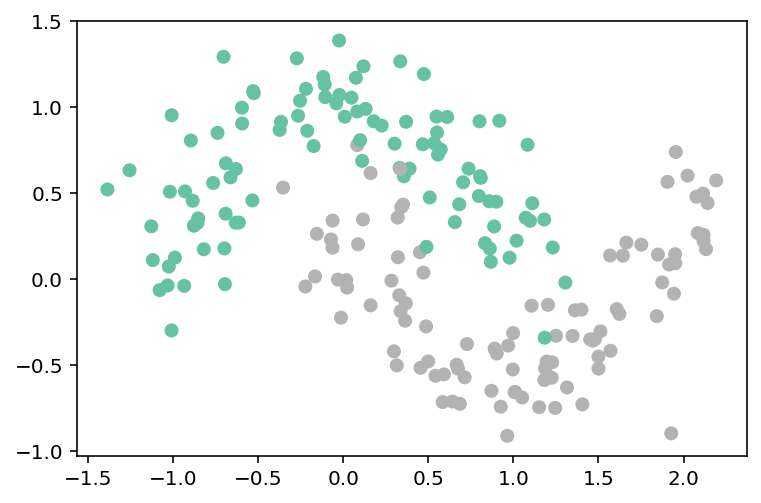

In [16]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

### Paso 1

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias = False)),
    ("lr", LogisticRegression(penalty="none", max_iter = 500))
])



### Paso 2

In [30]:
bagging_logreg = BaggingClassifier(model, n_estimators=100,random_state=314 )


### Paso 3

In [31]:
model.fit(X,y)
bagging_logreg.fit(X,y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('lr',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                                

### Paso 4

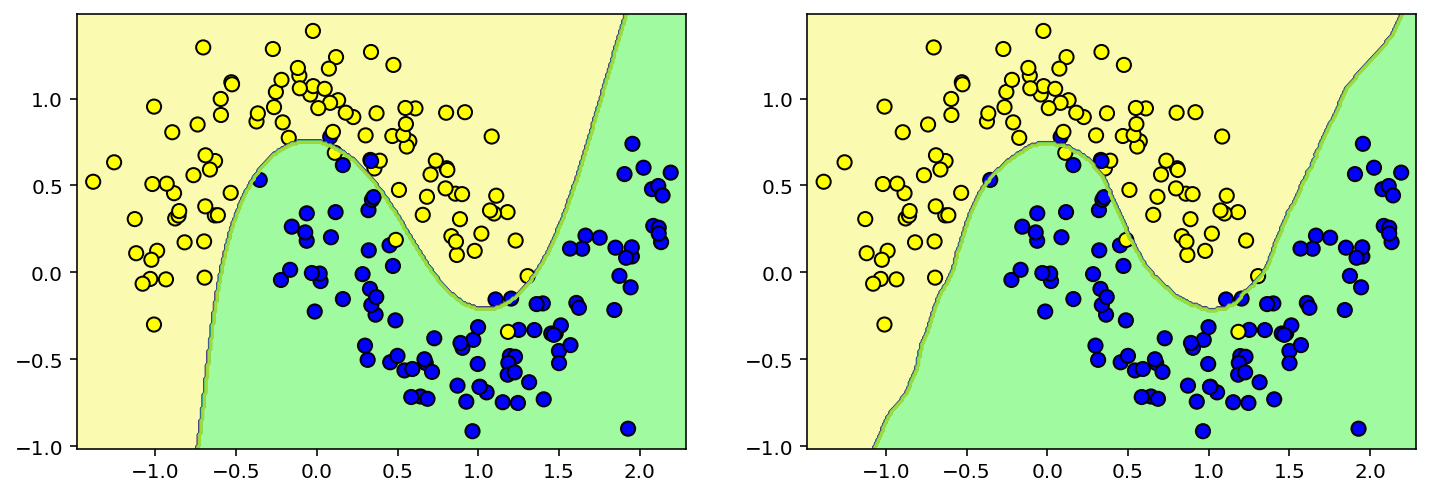

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

Se puede observar como la frontera de decisión se mantiene relativamente igual cuando se tiene un modelo que cuando se realiza un bagging de este mismo, incluso pareciera que las metricas no se verian impactadas de manera significativa.Cabe mencionar que la curva de decisión es menos suave para el caso del bagging.

### Paso 5

In [33]:
#Predicciones de model
y_pred = model.predict(X_test)

In [34]:
#Ṕredicciones del bagging
y_pred_bag = bagging_logreg.predict(X_test)

In [35]:
#f1_score para model
f1_score(y_test, y_pred)

0.9500000000000001

In [36]:
#f1_score para bagging
f1_score(y_test, y_pred_bag)

0.9743589743589743

Como se puede observar, utilizando un bagging de regresiones logisticas se mejora las metricas del poder predictivo de los modelos. Cabe mencionar que el modelo logistico ya tenia una muy buena metrica y que se mejora de manera gradual. Esto tambien va acorde a la similitud de las fronteras de decisión